### Importing Libraries for NLP

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


from nltk.tokenize import word_tokenize,sent_tokenize
import re
from nltk import pos_tag,ne_chunk_sents

from nltk.tokenize import regexp_tokenize,TweetTokenizer
from nltk.stem import WordNetLemmatizer



from collections import Counter 

#Spacy 
from spacy import load

#Text Preprocessing libraries

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix










### Importing Text File

In [2]:
with open('../NLP/Data/grail.txt','r') as myfile:
    scene_one = myfile.read()
    

In [3]:
sentences = sent_tokenize(scene_one)

In [4]:
sentences

['SCENE 1: [wind] [clop clop clop] \nKING ARTHUR: Whoa there!',
 '[clop clop clop] \nSOLDIER #1: Halt!',
 'Who goes there?',
 'ARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.',
 'King of the Britons, defeator of the Saxons, sovereign of all England!',
 'SOLDIER #1: Pull the other one!',
 'ARTHUR: I am, ...  and this is my trusty servant Patsy.',
 'We have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot.',
 'I must speak with your lord and master.',
 'SOLDIER #1: What?',
 'Ridden on a horse?',
 'ARTHUR: Yes!',
 "SOLDIER #1: You're using coconuts!",
 'ARTHUR: What?',
 "SOLDIER #1: You've got two empty halves of coconut and you're bangin' 'em together.",
 'ARTHUR: So?',
 "We have ridden since the snows of winter covered this land, through the kingdom of Mercea, through--\nSOLDIER #1: Where'd you get the coconuts?",
 'ARTHUR: We found them.',
 'SOLDIER #1: Found them?',
 'In Mercea?',
 "The coconut's tropic

In [5]:
tokenize_sent = word_tokenize(sentences[4])
tokenize_sent

['King',
 'of',
 'the',
 'Britons',
 ',',
 'defeator',
 'of',
 'the',
 'Saxons',
 ',',
 'sovereign',
 'of',
 'all',
 'England',
 '!']

In [6]:
unique_tokens = set(word_tokenize(scene_one))
unique_tokens

{'filth',
 'LUCKY',
 'built',
 'nine',
 'SIR',
 'executive',
 'five',
 'allowed',
 'Of',
 'KNIGHT',
 'indefatigable',
 'wiper',
 'make',
 'new',
 'horse',
 'bravely',
 'A',
 'He',
 'Once',
 'ooh',
 'forth',
 'un',
 'warm',
 'killed',
 'vain',
 'GALAHAD',
 'creak',
 'sure',
 'conclusions',
 'BORS',
 'SOLDIER',
 'us',
 'van',
 'sniff',
 'assist',
 'be',
 'wipers',
 'distress',
 'score',
 'ARTHUR',
 'wooden',
 'suddenly',
 'cruel',
 'lived',
 'SENTRY',
 'ANIMATOR',
 'Twenty-one',
 'Quoi',
 'business',
 'vache',
 'ways',
 'case',
 'Perhaps',
 'Black',
 'used',
 'tinder',
 'brain',
 'Chickennn',
 'bitching',
 'lot',
 'worried',
 'utterly',
 'yeah',
 'breath',
 'anarcho-syndicalist',
 'nor',
 'mashed',
 'everything',
 'Ah',
 'sword',
 'kneeling',
 'interested',
 'nostrils',
 'life',
 'None',
 'courage',
 'KING',
 'kills',
 'bird',
 'small',
 'Waa',
 'reasonable',
 'retold',
 'Ages',
 'window-dresser',
 'rich',
 'eisrequiem',
 'unplugged',
 'Anybody',
 "'",
 'yel',
 'mangled',
 'Grail',
 'whe

### Search a word in sentences

In [7]:
match = re.search('coconut',scene_one)
print('Coconut is at index from',match.start(),'to',match.end())

Coconut is at index from 580 to 587


### Search anything which is in [ ]

In [8]:
pattern2 = r'[.\*]'
print('Pattern is at index ',re.search(pattern2,scene_one))

Pattern is at index  <re.Match object; span=(188, 189), match='.'>


### 4th sentences begining word

In [9]:
print('Sentences at 4th is---->',sentences[3])

pattern3 = r'[\w\s]+:'
re.search(pattern3,sentences[3])

Sentences at 4th is----> ARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.


<re.Match object; span=(0, 7), match='ARTHUR:'>

### Pattern to find first hashtag in a tweet

In [10]:
tweets = ['This is the best #nlp exercise ive found online! #python',
 '#NLP is super fun! <3 #learning',
 'Thanks @datacamp :) #nlp #python']

In [11]:
pattern4 = r'#\w+' #word with hashtag

print('Hashtags:',regexp_tokenize(tweets[0],pattern4))


Hashtags: ['#nlp', '#python']


### Pattern to find hashtag and mention together

In [12]:
pattern5 = r'[@#]\w+'

print('Hashtags and Mention',regexp_tokenize(tweets[-1],pattern5))

Hashtags and Mention ['@datacamp', '#nlp', '#python']


### Tweet Tokenizer


        Print all tokens of tweet using Tweet Tokenizer

In [13]:
tknzr = TweetTokenizer()

all_tokens = [tknzr.tokenize(t) for t in tweets]
print(all_tokens)

[['This', 'is', 'the', 'best', '#nlp', 'exercise', 'ive', 'found', 'online', '!', '#python'], ['#NLP', 'is', 'super', 'fun', '!', '<3', '#learning'], ['Thanks', '@datacamp', ':)', '#nlp', '#python']]


### Capital Words

In [14]:
german_text = 'Wann gehen wir Pizza essen? 🍕 Und fährst du mit Über? 🚕'

pattern6 = r'[A-Z]\w+'

regexp_tokenize(german_text,pattern6)

['Wann', 'Pizza', 'Und']

In [15]:
with open('../NLP/Data/grail.txt') as f:
    holy_grail = f.read()

In [16]:
type(holy_grail)

str

In [17]:
holy_grail


"SCENE 1: [wind] [clop clop clop] \nKING ARTHUR: Whoa there!  [clop clop clop] \nSOLDIER #1: Halt!  Who goes there?\nARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.  King of the Britons, defeator of the Saxons, sovereign of all England!\nSOLDIER #1: Pull the other one!\nARTHUR: I am, ...  and this is my trusty servant Patsy.  We have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot.  I must speak with your lord and master.\nSOLDIER #1: What?  Ridden on a horse?\nARTHUR: Yes!\nSOLDIER #1: You're using coconuts!\nARTHUR: What?\nSOLDIER #1: You've got two empty halves of coconut and you're bangin' 'em together.\nARTHUR: So?  We have ridden since the snows of winter covered this land, through the kingdom of Mercea, through--\nSOLDIER #1: Where'd you get the coconuts?\nARTHUR: We found them.\nSOLDIER #1: Found them?  In Mercea?  The coconut's tropical!\nARTHUR: What do you mean?\nSOLDIER #1: Well, this is a t

### Split on line

In [18]:
lines = holy_grail.split('\n')
lines

['SCENE 1: [wind] [clop clop clop] ',
 'KING ARTHUR: Whoa there!  [clop clop clop] ',
 'SOLDIER #1: Halt!  Who goes there?',
 'ARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.  King of the Britons, defeator of the Saxons, sovereign of all England!',
 'SOLDIER #1: Pull the other one!',
 'ARTHUR: I am, ...  and this is my trusty servant Patsy.  We have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot.  I must speak with your lord and master.',
 'SOLDIER #1: What?  Ridden on a horse?',
 'ARTHUR: Yes!',
 "SOLDIER #1: You're using coconuts!",
 'ARTHUR: What?',
 "SOLDIER #1: You've got two empty halves of coconut and you're bangin' 'em together.",
 'ARTHUR: So?  We have ridden since the snows of winter covered this land, through the kingdom of Mercea, through--',
 "SOLDIER #1: Where'd you get the coconuts?",
 'ARTHUR: We found them.',
 "SOLDIER #1: Found them?  In Mercea?  The coconut's tropical!",
 'ARTHUR: Wh

### Remove the Author 

In [19]:
pattern = "[A-Z]{2,}(\s)?(#\d)?([A-Z]{2,})?:"
lines = [re.sub(pattern,'',l) for l in lines]
lines

['SCENE 1: [wind] [clop clop clop] ',
 ' Whoa there!  [clop clop clop] ',
 ' Halt!  Who goes there?',
 ' It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.  King of the Britons, defeator of the Saxons, sovereign of all England!',
 ' Pull the other one!',
 ' I am, ...  and this is my trusty servant Patsy.  We have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot.  I must speak with your lord and master.',
 ' What?  Ridden on a horse?',
 ' Yes!',
 " You're using coconuts!",
 ' What?',
 " You've got two empty halves of coconut and you're bangin' 'em together.",
 ' So?  We have ridden since the snows of winter covered this land, through the kingdom of Mercea, through--',
 " Where'd you get the coconuts?",
 ' We found them.',
 " Found them?  In Mercea?  The coconut's tropical!",
 ' What do you mean?',
 ' Well, this is a temperate zone.',
 ' The swallow may fly south with the sun or the house martin or the plover may see

(array([916., 177.,  52.,  22.,   9.,   4.,   4.,   5.,   1.,   2.]),
 array([  0. ,  10.3,  20.6,  30.9,  41.2,  51.5,  61.8,  72.1,  82.4,
         92.7, 103. ]),
 <a list of 10 Patch objects>)

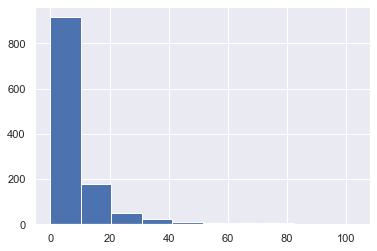

In [20]:
sns.set()
tokenized_lines = [regexp_tokenize(s,'\w+')for s in lines]
no_of_tokens = [len(t_line)  for t_line in tokenized_lines]
plt.hist(no_of_tokens)

### Building a Bag of Words

In [21]:
with open('../NLP/Data/articles.txt',encoding="utf8")as f:
    article = f.read()

### Tokenize the article

In [22]:
tokens = word_tokenize(article)
len(tokens)
tokens

['\ufeffImage',
 'copyright',
 'EPA',
 'Image',
 'caption',
 'Uber',
 'has',
 'been',
 'criticised',
 'many',
 'times',
 'over',
 'the',
 'way',
 'it',
 'runs',
 'its',
 'business',
 'Ride-sharing',
 'firm',
 'Uber',
 'is',
 'facing',
 'a',
 'criminal',
 'investigation',
 'by',
 'the',
 'US',
 'government',
 '.',
 'The',
 'scrutiny',
 'has',
 'started',
 'because',
 'the',
 'firm',
 'is',
 'accused',
 'of',
 'using',
 '``',
 'secret',
 "''",
 'software',
 'that',
 'let',
 'it',
 'operate',
 'in',
 'regions',
 'where',
 'it',
 'was',
 'banned',
 'or',
 'restricted',
 '.',
 'The',
 'software',
 ',',
 'called',
 '``',
 'greyball',
 "''",
 ',',
 'helped',
 'it',
 'identify',
 'officials',
 'seeking',
 'to',
 'stop',
 'the',
 'service',
 'running',
 '.',
 'A',
 'spokesman',
 'for',
 'Uber',
 'declined',
 'to',
 'comment',
 'on',
 'the',
 'investigation',
 ',',
 'reported',
 'the',
 'Reuters',
 'news',
 'agency',
 '.',
 'It',
 'is',
 'claimed',
 'greyball',
 'was',
 'used',
 'in',
 'several'

### Convert to Lowercase the tokens

In [23]:
lower_tokens = [t.lower() for t in tokens]
lower_tokens = Counter(lower_tokens)

### Most Number of words

In [24]:
lower_tokens.most_common(10)


[('the', 274),
 (',', 269),
 ('.', 189),
 ('to', 131),
 ('of', 119),
 ('a', 100),
 ('in', 99),
 ('and', 80),
 ('that', 67),
 ('’', 54)]

### Text Preprocessing

In [25]:
#Finding the alpha characters only

alpha_only = [t for t in lower_tokens if t.isalpha()]
len(alpha_only)

1428

In [26]:
#Declare stop words and remove stopwords from the alphawords

stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves',
 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs',
 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be',
 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if',
 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into',
 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off',
 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all',
 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same',
 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now', 'd', 'll', 'm', 'o', 're',
 've', 'y', 'ain', 'aren', 'couldn', 'didn', 'doesn', 'hadn', 'hasn', 'haven', 'isn', 'ma', 'mightn', 'mustn',
 'needn', 'shan', 'shouldn', 'wasn', 'weren', 'won', 'wouldn', '']



word = [t for t in alpha_only if t not in stopwords]
len(word)

1321

### Word Lemmatizer

In [27]:
wordnet = WordNetLemmatizer() 

word_lemm = [wordnet.lemmatize(t) for t in word]
len(word_lemm)


1321

### Bag of Word

In [28]:
bow = Counter(word_lemm)
bow.most_common(10)

[('time', 2),
 ('way', 2),
 ('business', 2),
 ('region', 2),
 ('official', 2),
 ('service', 2),
 ('ride', 2),
 ('booking', 2),
 ('company', 2),
 ('driver', 2)]

### Named Entity Recognition

In [29]:
with open ('../NLP/Data/uber_apple.txt',encoding='utf-8') as f:
    uber = f.read()
    

In [30]:
#Tokenize into sentences

sentences = sent_tokenize(uber)

#Token sentences

token_sent = [word_tokenize(sent) for sent in sentences]

#### Tag each token into POS(Parts of Speech)

In [31]:
pos = [pos_tag(sent) for sent in token_sent]
pos

[[('\ufeffThe', 'JJ'),
  ('taxi-hailing', 'JJ'),
  ('company', 'NN'),
  ('Uber', 'NNP'),
  ('brings', 'VBZ'),
  ('into', 'IN'),
  ('very', 'RB'),
  ('sharp', 'JJ'),
  ('focus', 'VB'),
  ('the', 'DT'),
  ('question', 'NN'),
  ('of', 'IN'),
  ('whether', 'IN'),
  ('corporations', 'NNS'),
  ('can', 'MD'),
  ('be', 'VB'),
  ('said', 'VBD'),
  ('to', 'TO'),
  ('have', 'VB'),
  ('a', 'DT'),
  ('moral', 'JJ'),
  ('character', 'NN'),
  ('.', '.')],
 [('If', 'IN'),
  ('any', 'DT'),
  ('human', 'JJ'),
  ('being', 'VBG'),
  ('were', 'VBD'),
  ('to', 'TO'),
  ('behave', 'VB'),
  ('with', 'IN'),
  ('the', 'DT'),
  ('single-minded', 'JJ'),
  ('and', 'CC'),
  ('ruthless', 'JJ'),
  ('greed', 'NN'),
  ('of', 'IN'),
  ('the', 'DT'),
  ('company', 'NN'),
  (',', ','),
  ('we', 'PRP'),
  ('would', 'MD'),
  ('consider', 'VB'),
  ('them', 'PRP'),
  ('sociopathic', 'JJ'),
  ('.', '.')],
 [('Uber', 'NNP'),
  ('wanted', 'VBD'),
  ('to', 'TO'),
  ('know', 'VB'),
  ('as', 'RB'),
  ('much', 'JJ'),
  ('as', 'IN'),

#### Chunked Sentences

In [32]:
chunked_sentences = ne_chunk_sents(pos,binary=True)
for sent in chunked_sentences:
    for chunk in sent:        
        if hasattr(chunk, "label") and chunk.label() == "NE":
            print(chunk)

(NE Uber/NNP)
(NE Beyond/NN)
(NE Apple/NNP)
(NE Uber/NNP)
(NE Uber/NNP)
(NE Travis/NNP Kalanick/NNP)
(NE Tim/NNP Cook/NNP)
(NE Apple/NNP)
(NE Silicon/NNP Valley/NNP)
(NE CEO/NNP)
(NE Yahoo/NNP)
(NE Marissa/NNP Mayer/NNP)


## SpacyNER

In [33]:
nlp = load('en_core_web_sm',tagger=False,parser=False,matcher=False)

doc= nlp(uber)

for d in doc.ents:
    print(d.label_,d.text)


ORG unroll.me
ORG Apple
PERSON Uber
FAC Travis Kalanick of Uber
PERSON Tim Cook
ORG Apple
CARDINAL Millions
PERSON Uber
LOC Silicon Valley
ORG Yahoo
PERSON Marissa Mayer
MONEY 186


## Count Vectorizer for Text Classification

In [34]:
fake_news = pd.read_csv('../NLP/Data/fake_or_real_news.csv')
fake_news.head()
    

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [35]:
y = pd.Series(fake_news['label'])
X = fake_news['text']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)


In [36]:
countvector = CountVectorizer(stop_words='english')
count_train = countvector.fit_transform(X_train)
count_test = countvector.transform(X_test)


In [37]:
countvector.get_feature_names()[:10]

['00',
 '000',
 '0000',
 '000000031',
 '00000031',
 '0001',
 '0002',
 '000billion',
 '000ft',
 '000km']

## TfidfVectorizer

In [38]:
tfidfvector = TfidfVectorizer(stop_words='english')

tfidf_train = tfidfvector.fit_transform(X_train)
tfidf_test = tfidfvector.transform(X_test)

tfidfvector.get_feature_names()[:10]

tfidf_train

<4434x57841 sparse matrix of type '<class 'numpy.float64'>'
	with 1151644 stored elements in Compressed Sparse Row format>

### Inspecting the vectors

In [39]:
count_df = pd.DataFrame(count_train.A, columns=countvector.get_feature_names())
count_df.head()

,00,000,0000,000000031,00000031,0001,0002,000billion,000ft,000km,...,שתי,תאמצנה,תוצאה,תחל,תיירות,תנותק,תעודת,תתרכז,القادمون,عربي
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Countvector Predictions

In [40]:
nb_classifier = MultinomialNB()
nb_classifier.fit(count_train,y_train)
y_pred = nb_classifier.predict(count_test)

score = accuracy_score(y_test,y_pred)
print('Accuracy Score',score)
cm = confusion_matrix(y_test,y_pred,labels=['FAKE','REAL'])
cm

Accuracy Score 0.8842714360862703


array([[824, 144],
       [ 76, 857]], dtype=int64)

### TFIDF Predictions

In [41]:
tfidf_classifier = MultinomialNB()
tfidf_classifier.fit(tfidf_train,y_train)
y_pred = tfidf_classifier.predict(tfidf_test)

score = accuracy_score(y_test,y_pred)
print('Accuracy Score',score)
cm = confusion_matrix(y_test,y_pred,labels=['FAKE','REAL'])
cm


Accuracy Score 0.820620725933719


array([[646, 322],
       [ 19, 914]], dtype=int64)

### Reference: 
https://learn.datacamp.com/courses/introduction-to-natural-language-processing-in-python